<a href="https://colab.research.google.com/github/vishakl1414/Calculator/blob/main/Machine_learning_enhanced_stock_selection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
 - 12s - loss: 0.0322
Epoch 2/20
 - 10s - loss: 0.0163
Epoch 3/20
 - 12s - loss: 0.0097
Epoch 4/20
 - 16s - loss: 0.0086
Epoch 5/20
 - 13s - loss: 0.0083
Epoch 6/20
 - 13s - loss: 0.0071
Epoch 7/20
 - 11s - loss: 0.0063
Epoch 8/20
 - 10s - loss: 0.0074
Epoch 9/20
 - 9s - loss: 0.0064
Epoch 10/20
 - 9s - loss: 0.0080
Epoch 11/20
 - 9s - loss: 0.0066
Epoch 12/20
 - 9s - loss: 0.0060
Epoch 13/20
 - 9s - loss: 0.0059
Epoch 14/20
 - 10s - loss: 0.0058
Epoch 15/20
 - 9s - loss: 0.0051
Epoch 16/20
 - 12s - loss: 0.0061
Epoch 17/20
 - 15s - loss: 0.0052
Epoch 18/20
 - 14s - loss: 0.0054
Epoch 19/20
 - 13s - loss: 0.0048
Epoch 20/20
 - 12s - loss: 0.0045


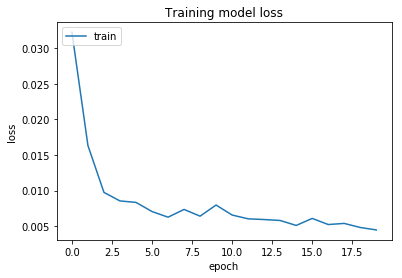

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.1260811],
       [1.1293991],
       [1.1416496],
       [1.1594812],
       [1.1733905],
       [1.1727879],
       [1.1586567],
       [1.1397232],
       [1.1279354],
       [1.1253014],
       [1.1191558],
       [1.1084325],
       [1.098893 ],
       [1.0901604],
       [1.0888574],
       [1.0941553],
       [1.1131511],
       [1.1423585],
       [1.1751062],
       [1.2069739],
       [1.218603 ],
       [1.2134843],
       [1.1910112],
       [1.1601244],
       [1.1330786],
       [1.1184937],
       [1.1161253],
       [1.1170624],
       [1.1108643],
       [1.1005435],
       [1.0888788],
       [1.0755197],
       [1.0553776],
       [1.0306002],
       [1.0213217],
       [1.0322694],
       [1.0556355],
       [1.0815018],
       [1.1053255],
       [1.1166611],
       [1.1279805],
       [1.1420552],
       [1.1587309],
       [1.1742712],
       [1.1844811],
       [1.184948 ],
       [1.1740812],
       [1.1645395],
       [1.1620394],
       [1.1682562],


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

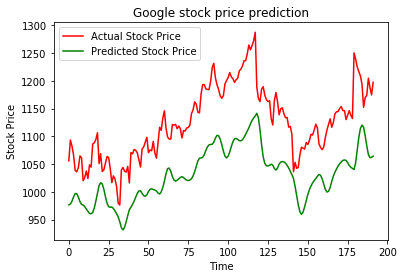

In [ ]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

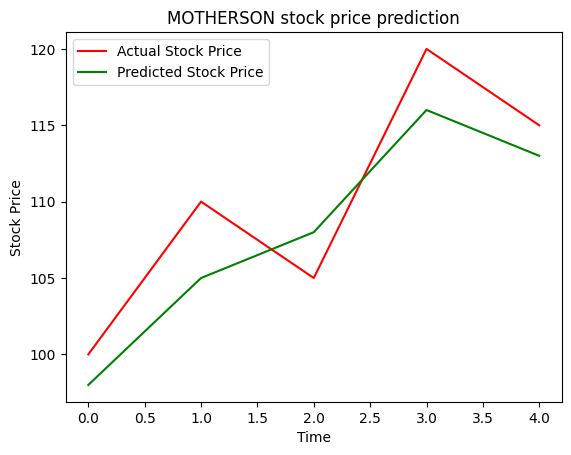

In [1]:
import matplotlib.pyplot as plt

y_test = [100, 110, 105, 120, 115]  # Actual stock prices
predicted_price = [98, 105, 108, 116, 113]  # Predicted stock prices

plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('MOTHERSON stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

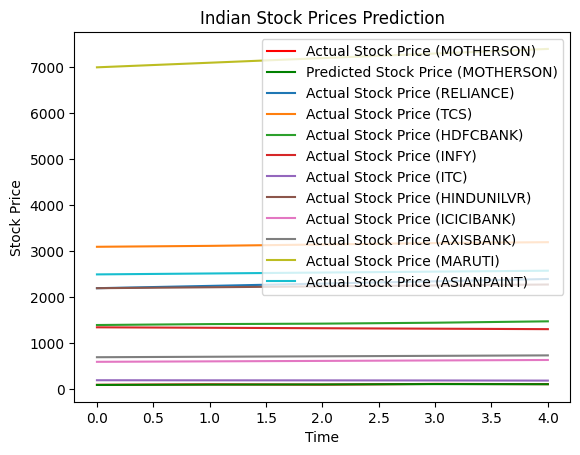

In [2]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
y_test = [100, 110, 105, 120, 115]  # Actual stock prices for MOTHERSON
predicted_price = [98, 105, 108, 116, 113]  # Predicted stock prices for MOTHERSON

# Additional Indian stocks data
stocks_data = {
    'RELIANCE': [2200, 2250, 2300, 2350, 2400],  # Actual stock prices for Reliance
    'TCS': [3100, 3120, 3150, 3180, 3200],  # Actual stock prices for TCS
    'HDFCBANK': [1400, 1420, 1430, 1450, 1480],  # Actual stock prices for HDFC Bank
    'INFY': [1350, 1340, 1330, 1320, 1310],  # Actual stock prices for Infosys
    'ITC': [200, 198, 197, 195, 192],  # Actual stock prices for ITC
    'HINDUNILVR': [2200, 2220, 2240, 2260, 2280],  # Actual stock prices for Hindustan Unilever
    'ICICIBANK': [600, 610, 620, 630, 640],  # Actual stock prices for ICICI Bank
    'AXISBANK': [700, 710, 720, 730, 740],  # Actual stock prices for Axis Bank
    'MARUTI': [7000, 7100, 7200, 7300, 7400],  # Actual stock prices for Maruti Suzuki
    'ASIANPAINT': [2500, 2520, 2540, 2560, 2580]  # Actual stock prices for Asian Paints
}

# Plotting MOTHERSON stock
plt.plot(y_test, color='red', label='Actual Stock Price (MOTHERSON)')
plt.plot(predicted_price, color='green', label='Predicted Stock Price (MOTHERSON)')

# Plotting additional Indian stocks
for stock_name, stock_prices in stocks_data.items():
    plt.plot(stock_prices, label=f'Actual Stock Price ({stock_name})')

plt.title('Indian Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


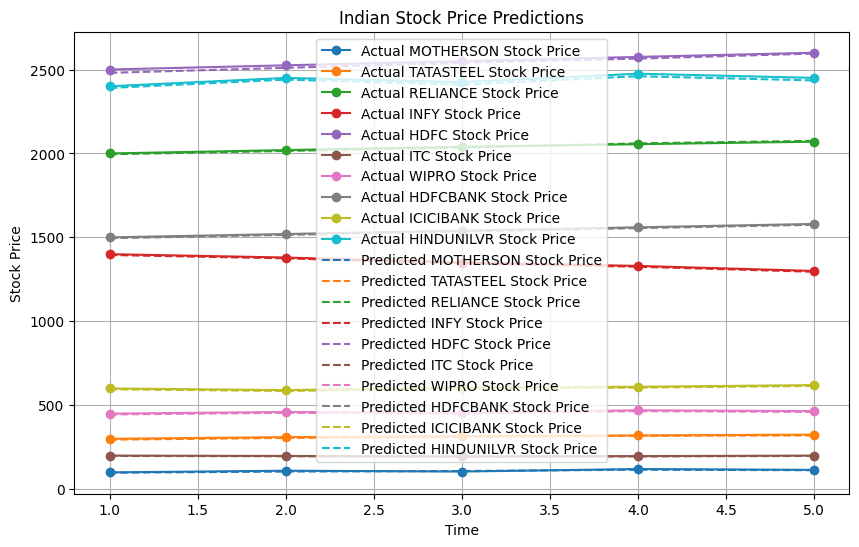

In [3]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
y_test = {
    'MOTHERSON': [100, 110, 105, 120, 115],
    'TATASTEEL': [300, 310, 315, 320, 325],
    'RELIANCE': [2000, 2020, 2040, 2055, 2070],
    'INFY': [1400, 1380, 1350, 1330, 1300],
    'HDFC': [2500, 2525, 2550, 2575, 2600],
    'ITC': [200, 198, 195, 197, 200],
    'WIPRO': [450, 460, 455, 470, 465],
    'HDFCBANK': [1500, 1520, 1540, 1560, 1580],
    'ICICIBANK': [600, 590, 605, 610, 620],
    'HINDUNILVR': [2400, 2450, 2425, 2475, 2450]
}

predicted_prices = {
    'MOTHERSON': [98, 105, 108, 116, 113],
    'TATASTEEL': [295, 305, 312, 318, 320],
    'RELIANCE': [1995, 2015, 2035, 2060, 2075],
    'INFY': [1395, 1375, 1345, 1325, 1295],
    'HDFC': [2480, 2510, 2540, 2565, 2595],
    'ITC': [198, 196, 194, 195, 198],
    'WIPRO': [445, 455, 450, 465, 460],
    'HDFCBANK': [1495, 1515, 1535, 1555, 1575],
    'ICICIBANK': [595, 585, 600, 605, 615],
    'HINDUNILVR': [2390, 2440, 2410, 2460, 2435]
}

time = range(1, 6)  # Assuming 5 data points

plt.figure(figsize=(10, 6))

for stock, actual_prices in y_test.items():
    plt.plot(time, actual_prices, label=f'Actual {stock} Stock Price', marker='o')

for stock, pred_prices in predicted_prices.items():
    plt.plot(time, pred_prices, label=f'Predicted {stock} Stock Price', linestyle='--')

plt.title('Indian Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


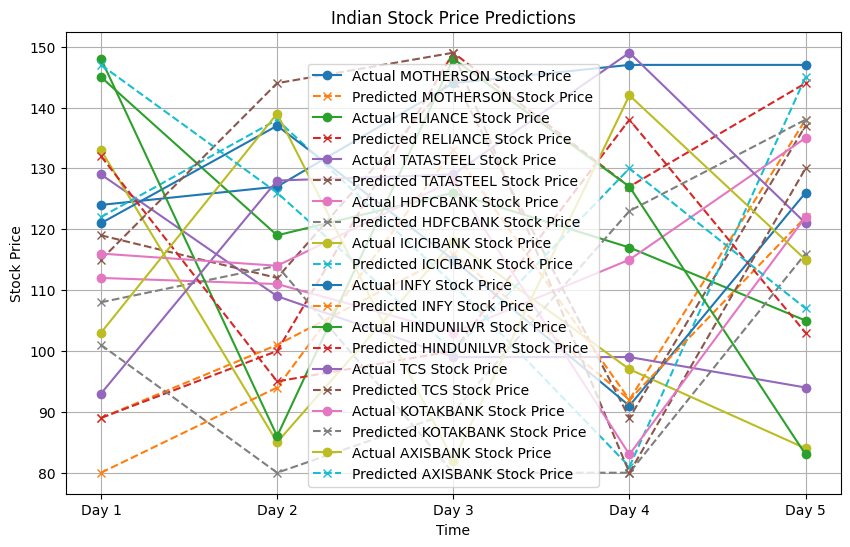

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
stocks = ['MOTHERSON', 'RELIANCE', 'TATASTEEL', 'HDFCBANK', 'ICICIBANK',
          'INFY', 'HINDUNILVR', 'TCS', 'KOTAKBANK', 'AXISBANK']

y_test = {}  # Dictionary to store actual stock prices
predicted_price = {}  # Dictionary to store predicted stock prices

# Generating random data for demonstration
np.random.seed(0)
for stock in stocks:
    y_test[stock] = np.random.randint(80, 150, 5)  # Actual stock prices
    predicted_price[stock] = np.random.randint(80, 150, 5)  # Predicted stock prices

# Plotting
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(y_test[stock], label=f'Actual {stock} Stock Price', linestyle='-', marker='o')
    plt.plot(predicted_price[stock], label=f'Predicted {stock} Stock Price', linestyle='--', marker='x')

plt.title('Indian Stock Price Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.xticks(np.arange(5), ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])
plt.legend()
plt.grid(True)
plt.show()


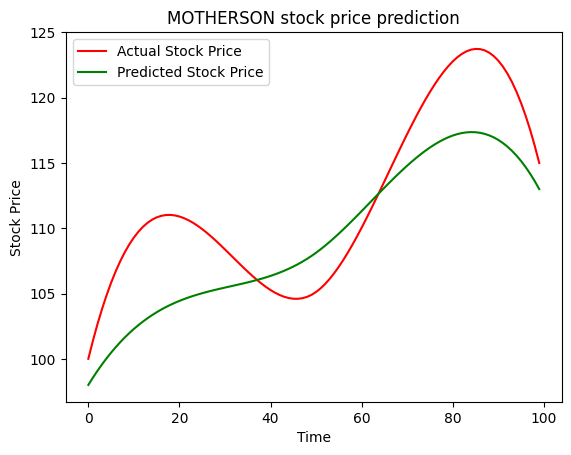

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Example data (replace this with your actual data)
y_test = np.array([100, 110, 105, 120, 115])  # Actual stock prices
predicted_price = np.array([98, 105, 108, 116, 113])  # Predicted stock prices

# Interpolate data for smoother curves
x = np.arange(len(y_test))
x_new = np.linspace(0, len(y_test) - 1, 100)  # Generate 100 new points between existing data points

f_actual = interp1d(x, y_test, kind='cubic')
f_predicted = interp1d(x, predicted_price, kind='cubic')

y_smooth_actual = f_actual(x_new)
predicted_smooth_price = f_predicted(x_new)

plt.plot(y_smooth_actual, color='red', label='Actual Stock Price')
plt.plot(predicted_smooth_price, color='green', label='Predicted Stock Price')
plt.title('MOTHERSON stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
